In [1]:
import os
import pandas
import swasputils

In [2]:
objects = swasputils.load_objects()
top_chisq = pandas.read_csv(os.path.join(swasputils.DATA_LOCATION, 'top_chisq.csv'))
top_sigma = pandas.read_csv(os.path.join(swasputils.DATA_LOCATION, 'top_sigma.csv'))

In [3]:
objects['Sigma * Chi Squared'] = objects['Sigma'] * objects['Chi Squared']

In [4]:
top_product = objects.sort_values('Sigma * Chi Squared', ascending=False)[:100]
swasputils.join_swasp_ids(top_product)

In [5]:
top_product

,Period Number,Period,Sigma,Chi Squared,Sigma * Chi Squared,SWASP ID
3343855,1,28343114.0,6.16,14749.57,90857.3512,1SWASPJ082532.84+352533.0
41444,1,9071568.0,5.60,14509.66,81254.0960,1SWASPJ001511.32-601325.0
778471,1,11142552.0,6.04,6886.85,41596.5740,1SWASPJ015930.16-312917.8
4877966,1,15986331.0,6.31,6304.39,39780.7009,1SWASPJ153555.65+010010.4
647656,1,16099373.0,5.60,7021.82,39322.1920,1SWASPJ012514.64-455628.1
...,...,...,...,...,...,...
33582,1,14603769.0,5.07,4020.52,20384.0364,1SWASPJ001201.86-543956.2
6427244,1,16093810.0,4.98,4092.32,20379.7536,1SWASPJ203756.96+002753.7
6923861,1,12176911.0,5.80,3500.81,20304.6980,1SWASPJ215419.27+234051.8
7454650,1,10150286.0,8.05,2516.70,20259.4350,1SWASPJ235618.83-043331.4


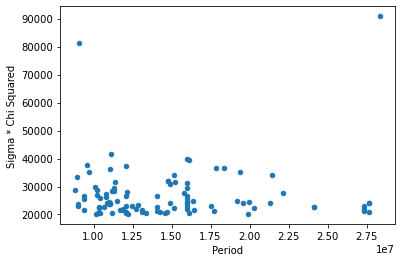

In [6]:
top_product.plot.scatter('Period', 'Sigma * Chi Squared')

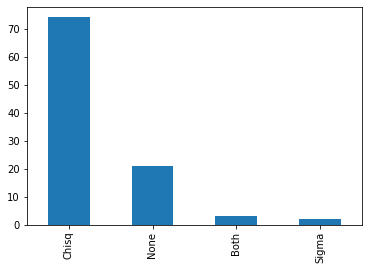

In [7]:
def get_overlap(swasp_id):
    in_sigma = swasp_id in list(top_sigma['SWASP ID'])
    in_chisq = swasp_id in list(top_chisq['SWASP ID'])
    if in_sigma and in_chisq:
        return 'Both'
    if in_sigma:
        return 'Sigma'
    if in_chisq:
        return 'Chisq'
    return 'None'
top_product['Overlap'] = top_product['SWASP ID'].apply(get_overlap)
top_product['Overlap'].value_counts().plot(kind='bar')

In [8]:
zoo_lookup = swasputils.load_lookup()
zoo_subjects = swasputils.load_zoo_subjects()
classifications = swasputils.load_classifications()
manual_classifications = swasputils.load_manual_classifications()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [9]:
top_product = swasputils.merge_zoo_ids(top_product, zoo_lookup)
top_product = swasputils.merge_zoo_subjects(top_product, zoo_subjects)
top_product = swasputils.merge_classifications(top_product, classifications)
top_product = swasputils.merge_manual_classifications(top_product, manual_classifications)
top_product = swasputils.decode_manual_annotations(top_product)
top_product

C:\Users\anm83\Documents\Code\superwasp-long-periods\swasputils.py:115: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(s)[0]['value']


,Period Number,Period,Sigma,Chi Squared,Sigma * Chi Squared,SWASP ID,Overlap,Zooniverse ID,locations,Classification,Period Uncertainty,Classification Count,Manual Classification
0,1,28343114.0,6.16,14749.57,90857.3512,1SWASPJ082532.84+352533.0,Chisq,24552064,"{""0"":""https://panoptes-uploads.zooniverse.org/...",5.0,0.0,1.0,Real
1,1,9071568.0,5.60,14509.66,81254.0960,1SWASPJ001511.32-601325.0,Chisq,22113344,"{""0"":""https://panoptes-uploads.zooniverse.org/...",5.0,0.0,3.0,Real
2,1,11142552.0,6.04,6886.85,41596.5740,1SWASPJ015930.16-312917.8,Chisq,24332481,"{""0"":""https://panoptes-uploads.zooniverse.org/...",NaN,NaN,NaN,Real
3,1,15986331.0,6.31,6304.39,39780.7009,1SWASPJ153555.65+010010.4,Chisq,24854625,"{""0"":""https://panoptes-uploads.zooniverse.org/...",6.0,1.0,1.0,Junk
4,1,16099373.0,5.60,7021.82,39322.1920,1SWASPJ012514.64-455628.1,Chisq,22668901,"{""0"":""https://panoptes-uploads.zooniverse.org/...",NaN,NaN,NaN,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,14603769.0,5.07,4020.52,20384.0364,1SWASPJ001201.86-543956.2,Both,22112021,"{""0"":""https://panoptes-uploads.zooniverse.org/...",6.0,1.0,4.0,Real
96,1,16093810.0,4.98,4092.32,20379.7536,1SWASPJ203756.96+002753.7,Chisq,24056647,"{""0"":""https://panoptes-uploads.zooniverse.org/...",5.0,0.0,1.0,Real
97,1,12176911.0,5.80,3500.81,20304.6980,1SWASPJ215419.27+234051.8,None,23428386,"{""0"":""https://panoptes-uploads.zooniverse.org/...",NaN,NaN,NaN,None
98,1,10150286.0,8.05,2516.70,20259.4350,1SWASPJ235618.83-043331.4,Sigma,27471069,"{""0"":""https://panoptes-uploads.zooniverse.org/...",NaN,NaN,NaN,Real


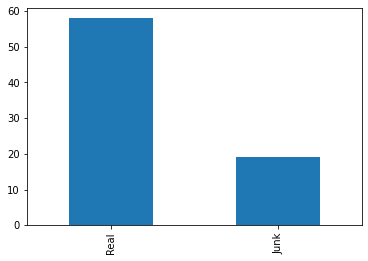

In [10]:
top_product['Manual Classification'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002864A7F0A00>]],
      dtype=object)

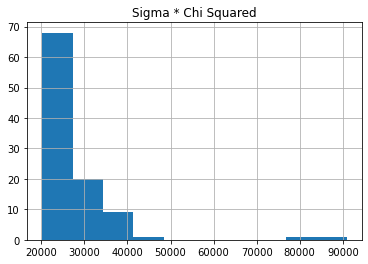

In [11]:
top_product.hist(column='Sigma * Chi Squared')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028660822820>,
      dtype=object)

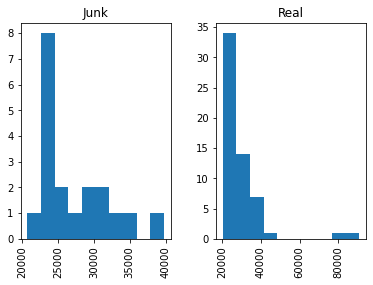

In [12]:
top_product.hist(column='Sigma * Chi Squared', by='Manual Classification', bins=10)

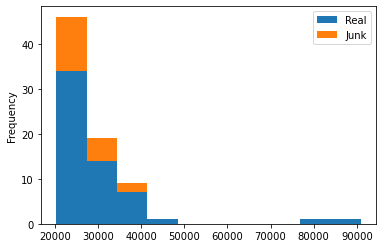

In [13]:
pandas.DataFrame({
    'Real': top_product[top_product['Manual Classification'] == 'Real']['Sigma * Chi Squared'],
    'Junk': top_product[top_product['Manual Classification'] == 'Junk']['Sigma * Chi Squared'],
}).plot.hist(bins=10, stacked=True)